In [12]:
import gzip
import pickle
import random

import matplotlib.pyplot as plt
import numpy as np

### Data Loading

In [1]:
with gzip.open('data/mnist.pkl.gz', "rb") as f:
    training_data, validation_data, test_data = pickle.load(f, encoding='bytes')

In [2]:
def vectorize(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [5]:
train_inputs = [np.reshape(x, (784, 1)) for x in training_data[0]]
train_labels = [vectorize(y) for y in training_data[1]]

training_data = list(zip(train_inputs,  train_labels))

test_inputs = [np.reshape(x, (784, 1)) for x in test_data[0]]
test_labels = [vectorize(y) for y in test_data[1]]

test_data = list(zip(test_inputs,  test_labels))

### Training

In [8]:
from smolnet import Network

smolnet = Network((784, 64, 32, 10))
smolnet.learning_rate = .8

smolnet.train(
    training_data=training_data,
    epochs=16,
    batch_size=32,
    test_data=test_data
)

Accuracy at epoch 3: 0.7227
Accuracy at epoch 6: 0.7711
Accuracy at epoch 9: 0.7857
Accuracy at epoch 12: 0.798
Accuracy at epoch 15: 0.8045


### Plotting Results

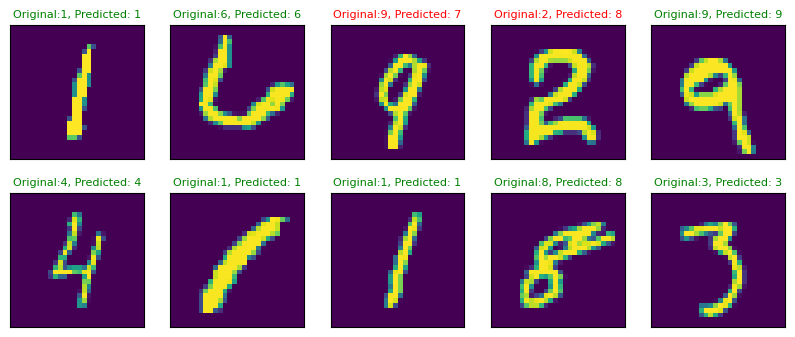

In [14]:
fig, axs = plt.subplots(2, 5)

for row in range(2):
    for column in range(5):
        samples = random.choice(test_data)
        predicted_label = np.argmax(smolnet.predict(samples[0]))
        actual_label = np.argmax(samples[1])
        axs[row, column].imshow(samples[0].reshape(28, 28))
        axs[row, column].set_title(
            f"Original:{actual_label}, Predicted: {predicted_label}",
            fontsize=8,
            color='green' if actual_label == predicted_label else 'red'
        )
        axs[row, column].set_xticks([])  
        axs[row, column].set_yticks([])  
fig.set_figheight(4)
fig.set_figwidth(10)

